### Challenge: evaluate your sentiment classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [2]:
amazon_data = pd.read_csv('./sentiment_analysis_nbayes/amazon_cells_labelled.txt',delimiter= '\t', header= None)
amazon_data.columns = ['Reviews', 'Positive']

In [3]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
amazon_data[100:150]

,Reviews,Positive
100,Integrated seamlessly with the Motorola RAZR phone.,1
101,"Buyer Beware, you could flush money right down the toilet.",0
102,Definitely a bargain.,1
103,The price was very good and with the free shipping and all it was a good purchase.,1
104,I received my supposedly new motorola 375 and apparently there was not a match between the phone and the charger.,0
105,"Pros:-Good camera - very nice pictures , also has cool styles like black and white, and more.",1
106,"That's a huge design flaw (unless I'm not using it correctly, which I don't think is the case).",0
107,"I love my 350 headset.. My Jabra350 bluetooth headset is great, the reception is very good and the ear piece is a comfortable fit.",1
108,"The camera, although rated at an impressive 1.3 megapixels, renders images that fall well below expectations of such a relatively high resolution.",0
109,I purcashed this for the car charger and it does not work.,0


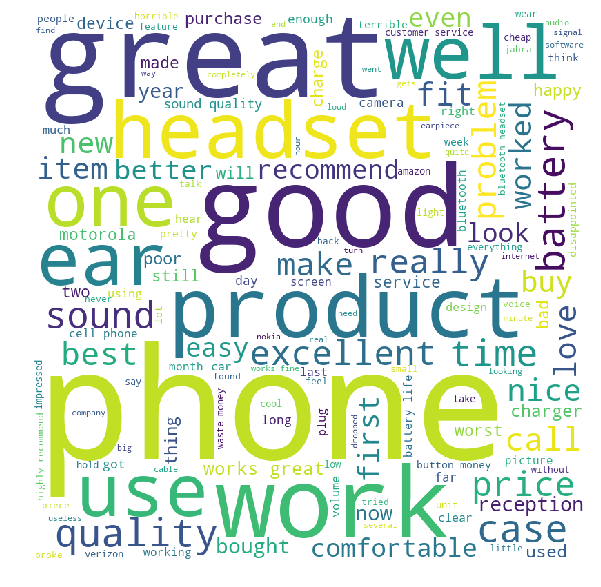

In [4]:
from wordcloud import WordCloud, STOPWORDS 
comment_words = ' '
stopwords = set(STOPWORDS) 
# iterate through the csv file 
for val in amazon_data.Reviews: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 12).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

The above word cloud gives us an insight into creating the features using the frequency of words; 

First lets start with the solution in the previous sentiment analysis assignment using amazon dataset.

In [5]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Reviews     1000 non-null object
Positive    1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [6]:
amazon_data['Positive'].value_counts()/1000

1    0.5
0    0.5
Name: Positive, dtype: float64

from the above executed line our data has equal proportion of positive and negative reviews,therefore in this case will not have class imbalance error problem.our concern will be the issue of overfitting.Before starting comparing combination of several features and the issue of overfitting,lets first redo the amazon dataset model fit from the previous assignment.

In [7]:
keywords = ['excellent','good', 'great', 'impress', 'amaz', 'love' 
            , 'recommend', 'nice', 'best', 'beautiful', 'happy']

In [8]:
import re
for key in keywords:
    amazon_data[key] = amazon_data.Reviews.apply(lambda x: bool(re.search(r'{}'.format(key), x, re.IGNORECASE)))
amazon_data['Positive'] = amazon_data.Positive.apply(lambda x: x == 1)    

In [9]:
amazon_data.head()

,Reviews,Positive,excellent,good,great,impress,amaz,love,recommend,nice,best,beautiful,happy
0,So there is no way for me to plug it in here in the US unless I go by a converter.,False,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",True,True,True,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,True,False,False,True,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,False,False,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,True,False,False,True,False,False,False,False,False,False,False,False


In [10]:
data = amazon_data[keywords]
target = amazon_data['Positive']

lets see the correlation between the column variables:

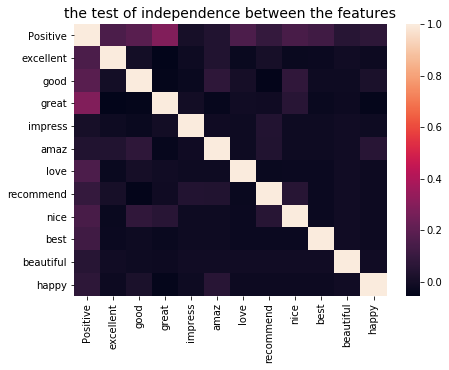

In [11]:
plt.figure(figsize = (7,5))
sns.heatmap(amazon_data.corr())
plt.title('the test of independence between the features', fontsize = 14);

so lets fit our model using the cross validaton techniques;

lets randomly select first without replacement 1000 samples from our dataset of size 1000.This help us to reshafle the data in the dataframe and satisfy randomness.

In [12]:
sampled_df = amazon_data.sample(n = 1000, axis = 0)
sampled_df.head()

,Reviews,Positive,excellent,good,great,impress,amaz,love,recommend,nice,best,beautiful,happy
505,"The sound quality for the device is unacceptable.Unless you are in a really quiet area, you almost hear nothing.",False,False,False,False,False,False,False,False,False,False,False,False
161,Great charger.,True,False,False,True,False,False,False,False,False,False,False,False
60,Essentially you can forget Microsoft's tech support.,False,False,False,False,False,False,False,False,False,False,False,False
823,They keep getting better and better (this is my third one and I've had numerous Palms too).,True,False,False,False,False,False,False,False,False,False,False,False
785,This allows the possibility of double booking for the same date and time after the first.,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
n_folds = 10
sample_size = 100
intervals = np.linspace(0, 1000, 11, dtype=int)

In [14]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
holdout = pd.DataFrame()
train_df = pd.DataFrame()
cross_validation = []
confus_matrix = []
from sklearn.metrics import confusion_matrix
for i in range(n_folds):
    holdout = sampled_df[intervals[i]:intervals[i + 1]]
    if i == 0:
        train_df = sampled_df[intervals[i + 1]:intervals[-1]]
    elif (i > 0) & (i < n_folds):
             train_df = pd.concat([sampled_df[intervals[0]:intervals[i]]
                                  , sampled_df[intervals[i + 1]:intervals[-1]]])
    else:
         train_df = sampled_df[intervals[0]:intervals[i]] 
    # Lets define the data and target for fitting the model        
    training_data = train_df[keywords]
    training_target = train_df['Positive']
    # and now for the holdout
    testing_data = holdout[keywords]
    testing_target = holdout['Positive']
    # fitting the model            
    bnb.fit(training_data, training_target)
    predicted = bnb.predict(testing_data)
    cross_validation.append(bnb.fit(training_data, training_target).score(testing_data, testing_target))
    confus_matrix.append(confusion_matrix(testing_target, predicted))

In [15]:
confus_matrix, cross_validation

([array([[48,  4],
         [21, 27]]), array([[38,  5],
         [29, 28]]), array([[52,  2],
         [22, 24]]), array([[43,  3],
         [27, 27]]), array([[41,  5],
         [21, 33]]), array([[60,  1],
         [15, 24]]), array([[41,  7],
         [30, 22]]), array([[47,  5],
         [24, 24]]), array([[42,  2],
         [28, 28]]), array([[52,  2],
         [25, 21]])],
 [0.75, 0.66, 0.76, 0.7, 0.74, 0.84, 0.63, 0.71, 0.7, 0.73])

In [16]:
bnb_1 = BernoulliNB()
bnb_1.fit(data, target)
from sklearn.model_selection import cross_val_score
cross_val_score(bnb_1, data, target, cv=10)

array([0.81, 0.73, 0.81, 0.69, 0.72, 0.69, 0.66, 0.68, 0.74, 0.66])

the above accuracy levels are not significantly variate so we can say that there is no overfitting in our model.

Lets add some features and check if our model performs better.lets add 'well' and 'better'.I managed to select these keywords based on the word cloud plot.

In [17]:
# added 'well' and  as features.
keywords_1 = keywords + ['well']

In [18]:
amazon_data_1 = amazon_data
for key in keywords_1:
    amazon_data_1[key] = amazon_data_1.Reviews.apply(lambda x: bool(re.search(r'{}'.format(key), x, re.IGNORECASE)))
amazon_data_1['Positive'] = amazon_data_1.Positive.apply(lambda x: x == 1)    

This time lets use sklearn cross validation function to fit and test our model.

In [19]:
data_1 = amazon_data_1[keywords_1]
target_1 = amazon_data_1['Positive']

In [20]:
bnb_1 = BernoulliNB()
bnb_1.fit(data_1,target_1)
from sklearn.model_selection import cross_val_score
cross_val_score(bnb_1, data_1, target_1, cv=10)

array([0.85, 0.74, 0.8 , 0.71, 0.75, 0.71, 0.68, 0.71, 0.76, 0.67])

We can see from the result of the cross validation that the performance was improved slightly.

This time lets remove 'impress', 'amaz' and 'beautiful' and 'happy' from the features which are not bolded in the wordcloud and see the performance.

In [21]:
keywords_2 = ['excellent','good', 'great','love','nice','best', 'recommend','well']

In [22]:
amazon_data_2 = amazon_data
for key in keywords_2:
    amazon_data_2[key] = amazon_data_2.Reviews.apply(lambda x: bool(re.search(r'{}'.format(key), x, re.IGNORECASE)))
amazon_data_2['Positive'] = amazon_data_2.Positive.apply(lambda x: x == 1)    

In [23]:
data_2 = amazon_data_2[keywords_2]
target_2 = amazon_data_2['Positive']

In [24]:
bnb_2 = BernoulliNB()
bnb_2.fit(data_2,target_2)
from sklearn.model_selection import cross_val_score
cross_val_score(bnb_2, data_2, target_2, cv=10)

array([0.83, 0.75, 0.8 , 0.73, 0.73, 0.69, 0.67, 0.71, 0.77, 0.63])

From the above cross validation values we can understand that the four variables had an very slight impact in better performance of our model even though they were not on the wordcloud.But are they worth adding to our model?Considering the curse of dimentionality i would rather trade them off.

now lets check the big words that we did not already add from the wordcloud because they logically do not make sense but for better understanding them and to see their usage and their impact to our model.

In [25]:
keywords_3 = ['phone', 'product','use','one', 'quality',]

In [26]:
amazon_data_3 = amazon_data
for key in keywords_3:
    amazon_data_3[key] = amazon_data_3.Reviews.apply(lambda x: bool(re.search(r'{}'.format(key), x, re.IGNORECASE)))
amazon_data_3['Positive'] = amazon_data_3.Positive.apply(lambda x: x == 1)    

In [27]:
data_3 = amazon_data_3[keywords_3]
target_3 = amazon_data_3['Positive']

In [28]:
bnb_3 = BernoulliNB()
bnb_3.fit(data_3,target_3)
from sklearn.model_selection import cross_val_score
cross_val_score(bnb_3, data_3, target_3, cv=10)

array([0.53, 0.48, 0.51, 0.52, 0.55, 0.5 , 0.5 , 0.5 , 0.47, 0.47])

The reason that i did not want include them at first was that,they do not logically indicate to which category they are classified more and the result seems consistent with my hypothesis that they equally classify to bad or good reviews.But to confidently support this aspect lets add these features to keywords_2 and run the model once more.

In [29]:
keywords_4 = keywords_2 + keywords_3

In [30]:
amazon_data_4 = amazon_data
for key in keywords_4:
    amazon_data_4[key] = amazon_data_4.Reviews.apply(lambda x: bool(re.search(r'{}'.format(key), x, re.IGNORECASE)))
amazon_data_4['Positive'] = amazon_data_4.Positive.apply(lambda x: x == 1)    

In [31]:
data_4 = amazon_data_4[keywords_4]
target_4 = amazon_data_3['Positive']

In [32]:
bnb_4 = BernoulliNB()
bnb_4.fit(data_4,target_4)
from sklearn.model_selection import cross_val_score
cross_val_score(bnb_4, data_4, target_4, cv=10)

array([0.83, 0.72, 0.8 , 0.73, 0.72, 0.7 , 0.67, 0.71, 0.74, 0.63])

yes!This proves that my hypothesis was right because their effect in adding to the accuracy criss-crosses it self.In all the model selections there was no overfitting.Model no.2 seems to perform best and most impactfull considering the tradeoff of the curse of dimentionality.The features to perform best were 'excellent','good', 'great','love','nice','best', 'recommend','well' which are from keywords_2.The reason is that we are looking for the positive reviews and those word selections have close tie to being positive and their performance was better.